SEPARATING INDEPENDENT AND DEPENDENT VARIABLES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_excel(r"/content/fuel consumption2 (1).xlsx")

In [4]:
print (df.head())

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


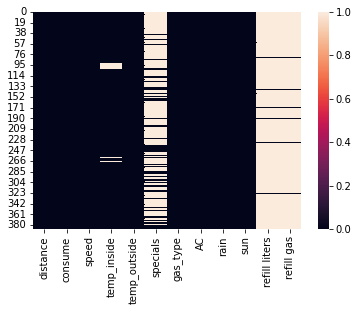

In [5]:
sns.heatmap(df.isnull())

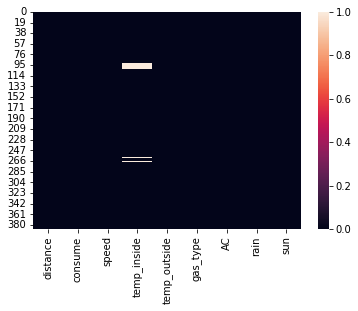

In [6]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

In [7]:
temp_inside_mean=np.mean(df['temp_inside'])
print(temp_inside_mean)

21.929521276595743


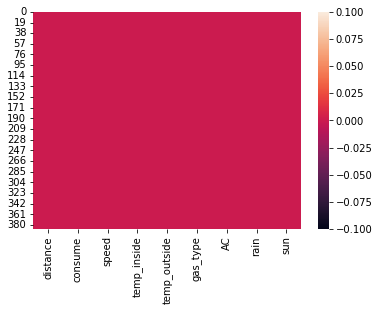

In [8]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)
sns.heatmap(df.isnull())

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [10]:
x=df.drop(['consume','gas_type'],axis=1)

In [11]:
y=df['consume']

In [12]:
x=x.values
y=y.values

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
l.fit(x_train,y_train)

LinearRegression()

In [15]:
x_train.shape

(271, 7)

In [16]:
y_pred=l.predict(x_test)

In [17]:
print(l.coef_,l.intercept_)

[ 0.00523674 -0.02371772 -0.14711979 -0.03724498  0.41456804  0.61676684
 -0.06407861] 9.389308142257129


In [18]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.742453260904708
0.6635761182069623
0.8616572757800562


In [19]:
dum1=pd.get_dummies(df['gas_type'])
print(dum1)

     E10  SP98
0      1     0
1      1     0
2      1     0
3      1     0
4      1     0
..   ...   ...
383    0     1
384    0     1
385    0     1
386    0     1
387    0     1

[388 rows x 2 columns]


In [20]:
df=pd.concat([df,dum1],axis=1)

In [21]:
df.drop('gas_type',axis=1,inplace=True)

In [22]:
x1=df.drop('consume',axis=1)

In [23]:
y1=df['consume']

In [24]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [25]:
x1=x1.values
y1=y1.values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
l.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[4.74529019 5.28091233 5.11846572 5.18647684 4.56157009 5.94153804
 5.67791213 5.1875266  5.9184726  4.89999431 4.11401843 4.81816564
 6.55944917 4.54590356 5.15076404 5.27935583 5.56137799 5.17741341
 5.50606796 5.30926079 4.15432495 5.25542486 4.98292477 5.18492997
 4.91054992 4.83501281 4.6153078  4.22470594 5.13956507 3.94766814
 4.92771037 5.2418133  4.6973807  4.6029162  5.59025114 4.99367775
 4.60405314 4.05578834 5.13330389 6.09737077 4.43083181 5.24444636
 5.4076802  4.4752234  4.65430171 4.33884762 5.04636663 5.21386519
 4.98020461 4.9576386  4.81670463 5.45808593 5.40516957 5.22776237
 4.66457082 4.94235635 6.70676371 5.38773946 4.67134584 4.8131749
 5.45529103 4.87254016 4.59362312 4.75236474 4.39718117 4.71136158
 5.58965398 4.37456263 4.84902188 4.87653148 4.31628735 4.70226084
 5.22645747 4.91851878 5.13891317 4.8356652  5.3587681  5.06026165
 5.42171176 5.11770749 5.3043894  5.48641183 4.5122806  5.38935851
 5.74873692 4.46660014 5.55202065 5.78283986 5.11834712 4.61048

In [29]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.8616572757800562


In [30]:
x_train.shape

(271, 7)

In [31]:
x_train[0]

array([12.3, 62. , 21.5,  6. ,  0. ,  0. ,  0. ])

In [32]:
import joblib
joblib.dump(l,'model.save')

['model.save']